In [1]:
"""
# @Author  : Rahul S H
# @Email   : rhoskeri50@gmail.com
# @File    : K_Median-Local_Search_1Swap.ipynb
"""
#Import section
import os
import sys
import math
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import psutil
import platform
import cpuinfo
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
print("                   System Information")
print("==========================================================")
c=platform.uname()
b=psutil.virtual_memory()
e=cpuinfo.get_cpu_info()

total_memory=b[0]
machine_type=c[4]
processor_type=e['brand_raw']

print("Machine Name: MacBook Pro")
print("Processor Type: ",processor_type)
print("Machine Architecture: ",machine_type)
print("Machine Memory(RAM): ",total_memory/(1024*1024*1024),"GB")
print("==========================================================")


                   System Information
Machine Name: MacBook Pro
Processor Type:  Intel(R) Core(TM) i7-8557U CPU @ 1.70GHz
Machine Architecture:  x86_64
Machine Memory(RAM):  8.0 GB


In [3]:
def euclidean_dist(a,b):
    x1,y1=a[0],a[1]
    x2,y2=b[0],b[1]
    return(math.sqrt(((x2-x1)**2)+(y2-y1)**2))

In [4]:
df_latlong=pd.read_csv("500 us city coordinates.txt",delimiter="\t",header=None)
coordinates=[]
file=open("500 us city coordinates.txt",'r')
for lines in file:
    coordinates.append([float(lines.split()[0]),float(lines.split()[1])])

In [5]:
#Calculate the euclidean cost between the cities

distance_cost=[]
for i in range(len(coordinates)):
    temp={}
    for j in range(len(coordinates)):
        if i==j:
            pass
        temp[j]=euclidean_dist(coordinates[i],coordinates[j])
    distance_cost.append(temp)
# distance_cost

In [6]:
# Calculate the connection cost for centers and return cost and assignments
def facility_cost(S,cities):
    facility_indication=-1
    cost=0
    assignment=[]
    for i in range(len(cities)):
        min_cost=sys.float_info.max
        for j in S:
#             if i not in S:
            if distance_cost[i][j]<min_cost:
                facility_indication=j
                min_cost=distance_cost[i][j]
        if min_cost!=sys.float_info.max:
            cost+=min_cost
            assignment.append((i,facility_indication))
    return cost,assignment
    

In [7]:
#Swap centers for better objective connection cost by 1% from the original cost and return new centers
def swap_centers(centers_copy1,centers_copy2):
    original_centers=centers_copy1
    new_centers=centers_copy2
    for i in range(len(original_centers)):
        for j in range(len(coordinates)):
            if j not in original_centers:
    #             print("here1")
                org_cost,org_assign=facility_cost(original_centers,coordinates)

                new_center_var=new_centers[i]
                new_centers[i]=j

                new_cost,new_assign=facility_cost(new_centers,coordinates)

                if new_cost<=(.99*org_cost):
    #                 print("here2")
                    original_centers[i]=j
                else:
                    new_centers[i]=new_center_var
    return new_centers
    

In [8]:
#return the assignment and the centers with assigned centers
def find_the_assignment(assignment):
    
    assignment=assignment
    assignment_dict={}
    for i in assignment:
        if i[1] not in assignment_dict:
            assignment_dict[i[1]]=distance_cost[i[0]][i[1]]
        elif i[1] in assignment_dict:
            if distance_cost[i[0]][i[1]]>assignment_dict[i[1]]:
                assignment_dict[i[1]]=distance_cost[i[0]][i[1]]
            else:
                pass

    assignment_dict_list={}
    for i in assignment:
        if i[1] not in assignment_dict_list:
            assignment_dict_list[i[1]]=[i[0]]
        elif i[1] in assignment_dict_list:
            assignment_dict_list[i[1]].append(i[0])
            
    return assignment_dict,assignment_dict_list

In [9]:
def facility_obj_calculation(k,f_opening_cost,connection_cost):
    return (k*f_opening_cost)+ 150 + (connection_cost)

In [10]:
# Start the algorithm with random k points as centers
S=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
k=len(S)

In [11]:
cost,assignment=facility_cost(S,coordinates)

The objective cost for kmedian with initial centers k= 20 random centers is  1014.9096774432268


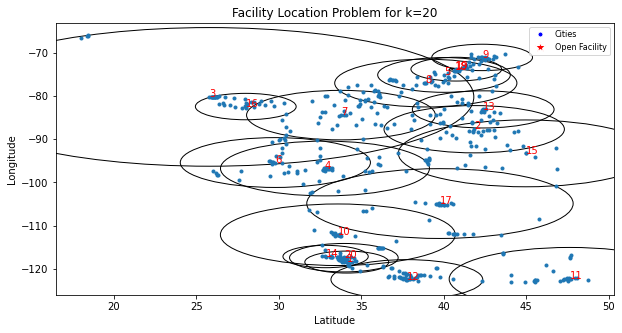

In [12]:
print("The objective cost for kmedian with initial centers k=",k, "random centers is ",cost)

assignment_dict,assignment_dict_list=find_the_assignment(assignment)

legend_elements = [Line2D( [0],[0],marker='o', color='w', label='Cities',markerfacecolor='b', markersize=5),
                    Line2D( [0],[0],marker='*', color='w', label='Open Facility',markerfacecolor='r', markersize=10)]


x=list(df_latlong[0])
y=list(df_latlong[1])
fig,ax=plt.subplots(figsize=(10,5))
plt.plot(x,y,'.',linewidth='.5')
for i in S:
    plt.annotate(str(i),xy=(x[i],y[i]),color='red')
    radius=assignment_dict[i]
    circle=plt.Circle((x[i],y[i]),radius,fill=False)
    ax.add_artist(circle)
    
plt.title("Facility Location Problem for k="+str(k))
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Longitude",fontsize=10)
plt.legend(handles=legend_elements, loc='upper right',prop={"size":8})
plt.savefig(str(os.getcwd())+"/"+"Befrore 1 swap"+".png")
plt.show()

In [13]:
# 1 Swap implementation
start=time.perf_counter()
new_centers=swap_centers(S.copy(),S.copy())
end=time.perf_counter()
print(end-start)

15.456576157999999


In [14]:
swap_cost,swap_assignment=facility_cost(new_centers,coordinates)
print("Centers before 1 swap",S)
print("Centers after 1 swap",new_centers)
k=len(new_centers)

Centers before 1 swap [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Centers after 1 swap [33, 2, 130, 4, 37, 43, 60, 8, 9, 10, 11, 12, 13, 6, 15, 16, 17, 3, 19, 20]


The objective cost for kmedian 1-swap algorithm for k= 20 centers is  803.5466802064261


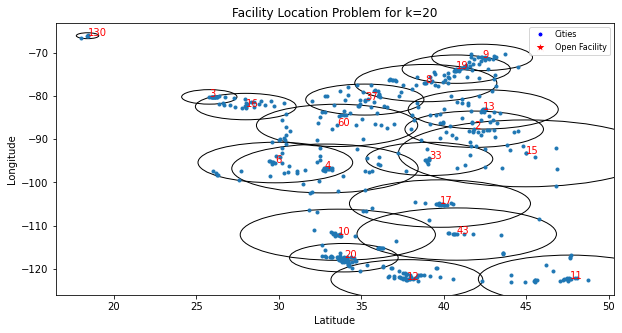

In [15]:
print("The objective cost for kmedian 1-swap algorithm for k=",k, "centers is ",swap_cost)

assignment_dict,assignment_dict_list=find_the_assignment(swap_assignment)

legend_elements = [Line2D( [0],[0],marker='o', color='w', label='Cities',markerfacecolor='b', markersize=5),
                    Line2D( [0],[0],marker='*', color='w', label='Open Facility',markerfacecolor='r', markersize=10)]


x=list(df_latlong[0])
y=list(df_latlong[1])
fig,ax=plt.subplots(figsize=(10,5))
plt.plot(x,y,'.',linewidth='.5')
for i in new_centers:
    plt.annotate(str(i),xy=(x[i],y[i]),color='red')
    radius=assignment_dict[i]
    circle=plt.Circle((x[i],y[i]),radius,fill=False)
    ax.add_artist(circle)
    
plt.title("Facility Location Problem for k="+str(k))
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Longitude",fontsize=10)
plt.legend(handles=legend_elements, loc='upper right',prop={"size":8})
plt.savefig(str(os.getcwd())+"/"+"Befrore 1 swap"+".png")
plt.show()


In [16]:
facility_opening_cost=swap_cost/20
obj_f_location=facility_obj_calculation(k,facility_opening_cost,swap_cost)
obj_f_location

1607.0933604128522

In [17]:
centers_dict={}
timing=[]
obj_facility_location_arr=[]
for i in range(1,51):
    centers_dict[i]=[i for i in range(1,i+1)]
for k in range(1,51):
    start=time.perf_counter()
    temp_centers=swap_centers(centers_dict[k].copy(),centers_dict[k].copy())
    cost,a=facility_cost(temp_centers,coordinates)
    obj_f_loc=facility_obj_calculation(k,facility_opening_cost,cost)
    end=time.perf_counter()
    net_time= end-start
    timing.append((k,net_time))
    obj_facility_location_arr.append((k,obj_f_loc,a))
#     print(k,net_time)

1 0.20435873699999973
2 0.4899936939999989
3 0.8364269670000013
4 1.2344697599999996
5 1.7655241520000011
6 2.2638944619999997
7 2.842454889999999
8 3.4140571549999983
9 4.087330870999999
10 4.800585703000003
11 5.4082603559999995
12 6.217407862000002
13 7.739960271000001
14 8.355367702999999
15 9.169076038
16 10.456558378000011
17 11.280127535000005
18 12.377319866999997
19 13.533037352999997
20 15.138515757000008
21 16.77746626999999
22 18.836510234000002
23 23.413663878999984
24 22.70219787800002
25 24.179395234999987
26 25.74302099000002
27 27.279290990999982
28 29.456853862000003
29 32.29207488700001
30 33.92564798000001
31 33.138897946999975
32 36.506249174999994
33 37.90710869499998
34 40.701353557999994
35 39.725526739999964
36 42.664802743999985
37 47.61868784700005
38 47.758752842000035
39 50.325937189
40 54.69981021400008
41 55.937787448999984
42 57.25284719799993
43 61.76827891100004
44 61.88393699200003
45 65.00860458399984
46 66.67731438200008
47 69.78741560599997
48 74.8

17 1599.3548828812802


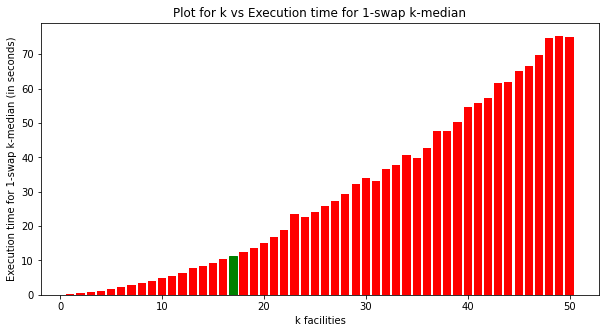

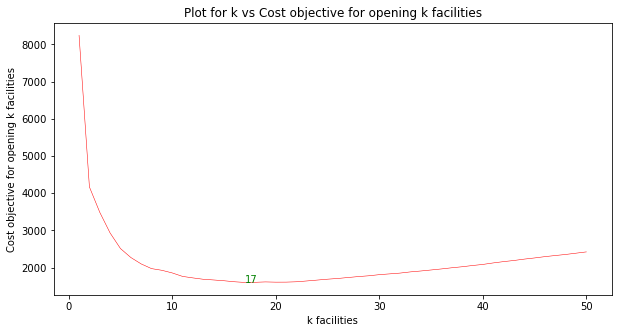

In [29]:
#Check the lowest cost objective among k=1 and k=50
lowest_objective=sys.float_info.max
k=None
lowest_cost_assignment=[]
new_centers=[]

for i in obj_facility_location_arr:
    if i[1]<lowest_objective:
        lowest_objective=i[1]
        k=i[0]
        lowest_cost_assignment=i[2]
print(k,lowest_objective)

#PLot for k vs 1swap execution time
x=list(i[0] for i in timing)
y=list(i[1] for i in timing)
fig,ax=plt.subplots(figsize=(10,5))
bar_list=plt.bar(x,y,color='red')
bar_list[k-1].set_color('g')
plt.xlabel("k facilities")
plt.ylabel("Execution time for 1-swap k-median (in seconds)")
plt.title("Plot for k vs Execution time for 1-swap k-median")
plt.savefig(str(os.getcwd())+"/"+"Plot1"+".png")
plt.show()

#Plot for k vs Facility loaction cost objective
x=list(i[0] for i in obj_facility_location_arr)
y=list(i[1] for i in obj_facility_location_arr)
fig,ax=plt.subplots(figsize=(10,5))
plt.plot(x,y,'-',linewidth='.5',color='r')
plt.annotate(str(k),xy=(x[k-1],y[k-1]),color='g')
plt.xlabel("k facilities")
plt.ylabel("Cost objective for opening k facilities")
plt.title("Plot for k vs Cost objective for opening k facilities")
plt.savefig(str(os.getcwd())+"/"+"Plot2"+".png")
plt.show()

Original Centers [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
New Centers [5, 121, 2, 16, 4, 6, 7, 9, 10, 11, 12, 13, 33, 17, 37, 43, 130]


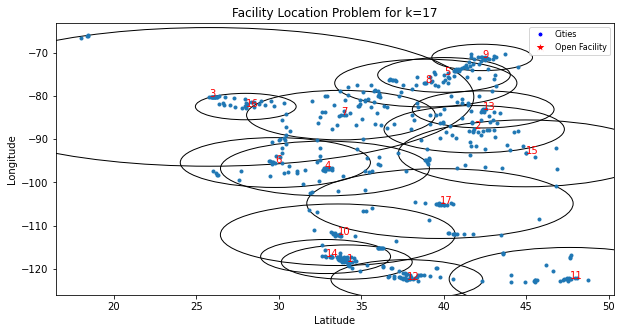

The objective cost for kmedian 1-swap Facility location for k= 17 centers is  1599.3548828812802


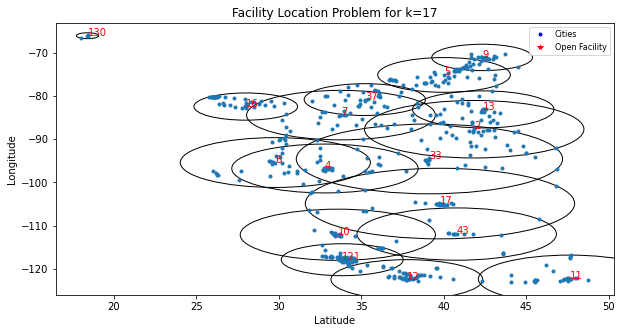

In [37]:
#Plot for the lowest object facility location assignment
for i in lowest_cost_assignment:
    if i[1] not in new_centers:
        new_centers.append(i[1])
        
print("Original Centers",centers_dict[k])
print("New Centers",new_centers)


#Original Centers Assignment Plot
t_cost,t_assignment=facility_cost(centers_dict[k],coordinates)

assignment_dict,assignment_dict_list=find_the_assignment(t_assignment)

legend_elements = [Line2D( [0],[0],marker='o', color='w', label='Cities',markerfacecolor='b', markersize=5),
                    Line2D( [0],[0],marker='*', color='w', label='Open Facility',markerfacecolor='r', markersize=10)]


x=list(df_latlong[0])
y=list(df_latlong[1])
fig,ax=plt.subplots(figsize=(10,5))
plt.plot(x,y,'.',linewidth='.5')
for i in centers_dict[k]:
    plt.annotate(str(i),xy=(x[i],y[i]),color='red')
    radius=assignment_dict[i]
    circle=plt.Circle((x[i],y[i]),radius,fill=False)
    ax.add_artist(circle)
    
plt.title("Facility Location Problem for k="+str(k))
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Longitude",fontsize=10)
plt.legend(handles=legend_elements, loc='upper right',prop={"size":8})
plt.savefig(str(os.getcwd())+"/"+"OriginalCenters"+str(k)+".png")
plt.show()


if k!=None:
    print("The objective cost for kmedian 1-swap Facility location for k=",k, "centers is ",lowest_objective)

    assignment_dict,assignment_dict_list=find_the_assignment(lowest_cost_assignment)

    legend_elements = [Line2D( [0],[0],marker='o', color='w', label='Cities',markerfacecolor='b', markersize=5),
                        Line2D( [0],[0],marker='*', color='w', label='Open Facility',markerfacecolor='r', markersize=10)]


    x=list(df_latlong[0])
    y=list(df_latlong[1])
    fig,ax=plt.subplots(figsize=(10,5))
    plt.plot(x,y,'.',linewidth='.5')
    for i in new_centers:
        plt.annotate(str(i),xy=(x[i],y[i]),color='red')
        radius=assignment_dict[i]
        circle=plt.Circle((x[i],y[i]),radius,fill=False)
        ax.add_artist(circle)

    plt.title("Facility Location Problem for k="+str(k))
    plt.xlabel("Latitude",fontsize=10)
    plt.ylabel("Longitude",fontsize=10)
    plt.legend(handles=legend_elements, loc='upper right',prop={"size":8})
    plt.savefig(str(os.getcwd())+"/"+"Final Centers"+str(k)+".png")
    plt.show()



